This lab is an introduction to audio and image processing. You will be learning how to use some Python packages that are commonly used in these domains. Part 1 deals will audio, and part 2 will be on images.

Name: Artur Sak 

NetID:(sak2)

# Part 1 - Loading and Visualizing Digital Audio

In [171]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# Plotly initialization

Sound is minute pressure changes in the medium it it travelling in, this pressure change is measured by a microphone and converted into signal levels. The most direct way to visualize this captured information is to plot out these values directly.

In [172]:
Fs, wav = wavfile.read('data/italian.wav')

Plotting the audio signal

In [173]:
from IPython.display import Audio

In [174]:
Audio('data/italian.wav')

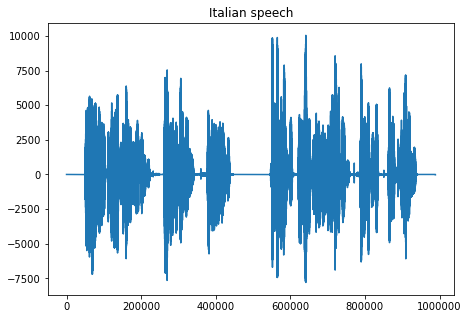

In [175]:
fig = plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(wav);
plt.title('Italian speech')

## Exercise 1 - Baby steps

1. Write a function to compute the length of the audio file in seconds
2. Write a function to plot out short section of the audio clip instead of the whole length

20000


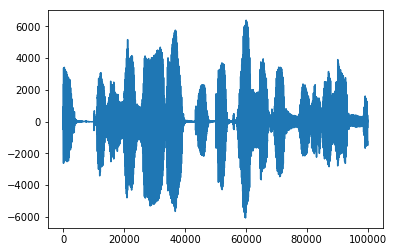

In [176]:
def audioLength(signal, samplingRate):
    #signal is a single channel of the audio file, samplingRate is the, well, the sampling rate of the signal
    #If you are lost here, check the documentation for scipy.io.wavefile :)
    #your code here
    no_samples = len(signal)
    duration = no_samples / samplingRate * 1000

    return duration

def getWindow(signal, start, end, windowFunc=None):
    #ignore windowFunc for now
    #signal is a single channel of your audio file
    #The function should return the signal values from [start,end), the value indexed by end is excluded
    
    section = signal[start:end]

    return section


print audioLength(wav, Fs)    
plt.plot(getWindow(wav, 100000, 200000))

## Better Visualization

It is difficult to see what's happening in the audio signal from the plots above. To analyze audio content, in applications such as speaker recognition or audio content identification, a necessary tool is the **spectrogram**. The spectrogram can be used to visualize the frequency content of the audio signal as it progresses over time.

Mathematically, the spetrogram is the **squared-magnitude** of 
the Fourier transform of overlapping segments, or windows, of the audio signal.
To generate the spectrogram, the signal must first be separated into
overlapping segments. If we denote the signal as 
$\vec{x} = [x_{0}, x_{1},..., x_{N-1}]$, a one-dimensional vector of $N$ samples,
Then the segments would be given as
$$ 
\vec{x}_{0}=[x_{0}, x_{1},..., x_{N}],\\
\vec{x}_{1}=[x_{M}, x_{M+1},..., x_{M+N}],\\
\vdots\\
\vec{x}_{i}=[x_{iM}, x_{iM + 1},..., x_{iM+N}],
$$
where $M$ is the step size between windows
and $N$ is the length of each window. To generate a smoother spectrogram,
it is common to multiply the windows element-wise with a 
*windowing filter* $\vec{w}$. A popular choice of a window
filter is the Hamming window.

### Windowing Functions

Using hard cut-offs at the boundaries of the windows can cause various undesirable artifacts. In order to reduce these effects, windowing functions can be applied to these rectangular clips. Numpy provides `hamming()` to generate what is known as the Hamming window. We apply this window to the signal we obtained above by performing an elementwise multiplication.

Note:
Not multiplying the signal by any fancy windowing function is sometimes called the rectangular window.

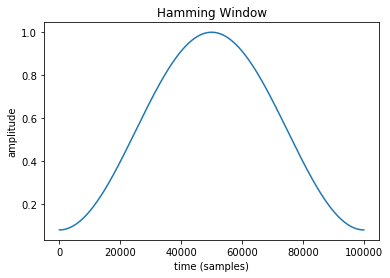

In [177]:
N = 200000 - 100000
w = np.hamming(N)      # generate a Hamming window of length N
s = wav[100000:200000] # how many samples does s have? N or N+1?

plt.figure()
plt.plot(w) # plot the window
plt.title('Hamming Window')
ax = plt.axes()
ax.set_xlabel('time (samples)')
ax.set_ylabel('amplitude')

### Exercise 2

Now modify the definition of your `getWindow()` function, it should now apply the hamming window to the signal that was obtained.

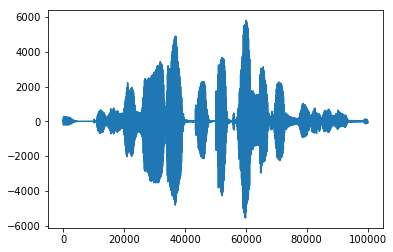

In [178]:
def getWindow(signal, start, end):
    #signal is a single channel of your audio file
    #The function should return the signal values from [start,end), the value indexed by end is excluded
    #windowFunc should be a function that will generate a window function, here we will just pass in np.hamming
    section = signal[start:end] * np.hamming(end - start)
    return section

plt.plot(getWindow(wav, 100000, 200000))

### Fourier Transform

Applying a Fourier Transform to a signal allows us to view it's frequency content.

To generate the frequency content for the spectrogram, the **Fourier transform** is applied
to the windowed segments of the input and the magnitude of the result is squared
and stored,

$$\vec{f}_{i} = \left\|\mathcal{FFT}\left(\vec{w}\odot \vec{x}_{i}\right)\right\|^{2},$$

where $\odot$ represents elementwise multiplication. Note that the Fourier transform
produces both negative and positive frequencies, but the content of the negative frequencies are
redundant, since the spectrogram stores the *magnitude* of the FT result and we are dealing
with *real* signals. Therefore, only $\vec{f}_{i,[0:N/2 + 1]}$ is needed. The function **rfft()** takes
care of this for you.

(0, 22050)

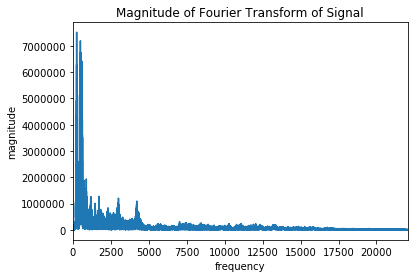

In [179]:
f = np.fft.rfft(s)                   # Fourier transform of signal, keeping only the positive frequencies

freq = np.arange(f.size)*(Fs/2.)/f.size    # generate frequencies for plot

fig_fft = plt.figure()
plt.plot(freq, np.absolute(f))
plt.title('Magnitude of Fourier Transform of Signal')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,22050)

### Exercise 3

a.  What's the length of `f` in the code segment above?

In [180]:
print "Length of f: " + str(len(f))

Length of f: 50001


 b. Plot only the first [0,1250] frequency of the above Fourier Transform.

(0, 1250)

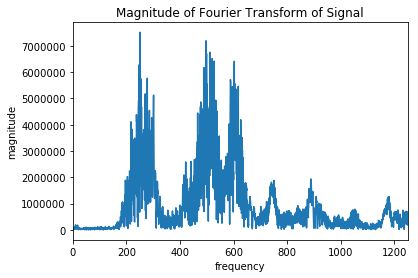

In [181]:
fig_fft = plt.figure()
plt.plot(freq, np.absolute(f))
plt.title('Magnitude of Fourier Transform of Signal')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1250)

c. Plot the frequency content of a rectangular window and a Hamming window. Give a brief description (One sentence) of the differences between these windows. 

(0, 1250)

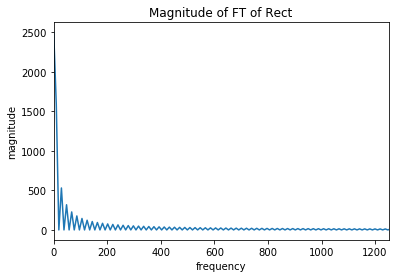

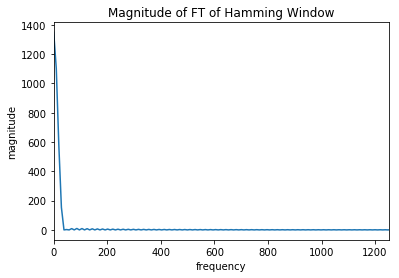

In [182]:
f = np.fft.rfft(np.concatenate((np.ones(2500),np.zeros(2500))))
freq = np.arange(f.size)*(Fs/2.)/f.size
fig_fft = plt.figure()
plt.plot(freq, np.absolute(f))
plt.title('Magnitude of FT of Rect')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1250)


f = np.fft.rfft(np.concatenate((np.hamming(2500),np.zeros(2500))))
freq = np.arange(f.size)*(Fs/2.)/f.size
fig_fft = plt.figure()
plt.plot(freq, np.absolute(f))
plt.title('Magnitude of FT of Hamming Window')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1250)

d. Plot the FFT of a window of the signal using the rectangular window and one with a hamming window.  For the plots, you might want to play with the scales on the axis to see better

(0, 7000000)

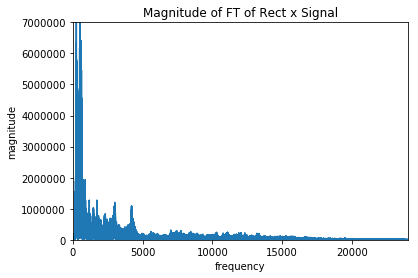

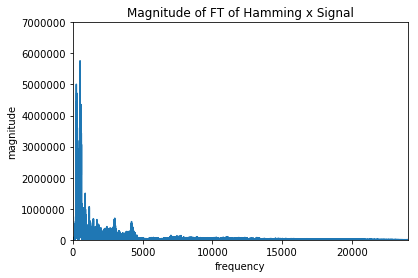

In [190]:
rect = 
hamm = np.hamming(s.size)

f_rect = np.fft.rfft(np.concatenate((np.multiply(s,rect),np.zeros(s.size))))
f_hamm = np.fft.rfft(np.concatenate((np.multiply(s,hamm),np.zeros(s.size))))

freq = np.arange(f_rect.size)*(Fs/2.)/f_rect.size
plt.plot(freq, np.absolute(f_rect))
plt.title('Magnitude of FT of Rect x Signal')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,24000)
ax.set_ylim(0,7000000)

freq = np.arange(f_hamm.size)*(Fs/2.)/f_hamm.size
fig_fft = plt.figure()
plt.plot(freq, np.absolute(f_hamm))
plt.title('Magnitude of FT of Hamming x Signal')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,24000)
ax.set_ylim(0,7000000)

### Frequency Domain Visualization

Here we will utilize a built in function in matplotlib to plot the spectrogram of the audio signal. The spectrogram is computed from a overlapping sliding window of the audio signal, with the windowing function applied. This is typically called the Short Time Fourier Transform(STFT) of the audio signal. Each column in the plot represents a window of the signal, the y-axis represents the frequency and the color represents the magnitude.

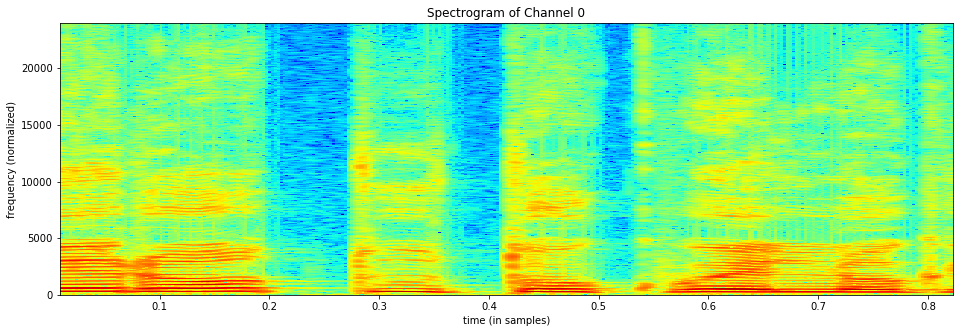

In [184]:
fig, (ax1) = plt.subplots(ncols=1) # create plot
fig.set_size_inches(16, 5)

N=1024
M=128

# generate & plot spectrogram (built-in function)
data, freqs, bins, im = ax1.specgram(wav[130000:170000],Fs = Fs, NFFT=N, noverlap=(N-M), window = np.hamming(N), cmap = 'jet')   
ax1.axis('tight')
ax1.set_title('Spectrogram of Channel 0')
ax1.set_ylabel('frequency (normalized)')
ax1.set_xlabel('time (in samples)')

## Exercise 4

3. Looking at the spectrograms above, are you able to guess the number of words in this speech? Describe briefly the reasons.
4. Now listen to the provided wav file, are you able to confirm the answer? 

**1. I think there are 4 words, based on the spectrogram above. There seem to be 3 large blue areas and one small blue area at the end of the plot.**

**2. My answer is confirmed, there are 4 words. The woman says "però tutto quello che" (4 words).**

In [185]:
Audio(wav[130000:170000], rate=Fs)

# Part 2 - Digital Images

In this part, we will be looking at digital image representation

In [186]:
from PIL import Image
import os

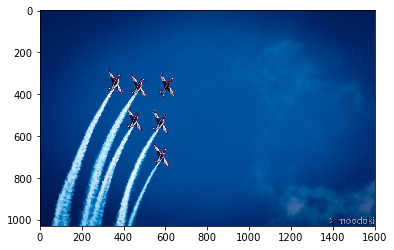

In [187]:
# Read in the image file and convert it into a numpy array
img = np.array(Image.open('data/roulettes.jpg'))
image_stat = os.stat('data/roulettes.jpg')

plt.imshow(img)

## Exercise 5

Please write code to answer the following questions: 

a. Print the height and width of the image.

b. Calulate the compression ratio of this JPEG image. Recall that an image is suppose to be made of pixels and each pixels is about 3 bytes.

c. Show the R,G,B, channel seperately in a row, by making the other two channels all zeros. 

d. Plot the histogram of each channel.

e. Extra credit: implement a method of segmenting the planes from the sky. Plot the segmentation result.


In [188]:
print "Height: " + str(img.shape[0])
print "Width: " + str(img.shape[1])
print "Compression Ratio: " + str(img.shape[0] * img.shape[1] * img.shape[2] / image_stat.st_size)

Height: 1029
Width: 1600
Compression Ratio: 13


[]

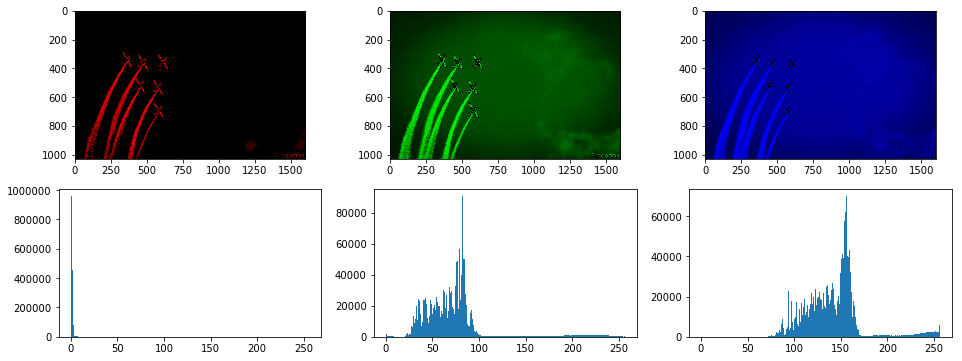

In [189]:
plt.figure(figsize=(16,6))

plt.subplot(2,3,1)
one_channel = np.zeros_like(img, dtype="uint8")
one_channel[:,:,0] = img[:,:,0]
plt.imshow(one_channel)


plt.subplot(2,3,2)
one_channel = np.zeros_like(img, dtype="uint8")
one_channel[:,:,1] = img[:,:,1]
plt.imshow(one_channel)

plt.subplot(2,3,3)
one_channel = np.zeros_like(img, dtype="uint8")
one_channel[:,:,2] = img[:,:,2]
plt.imshow(one_channel)

plt.subplot(2,3,4)
plt.hist(img[:,:,0].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,5)
plt.hist(img[:,:,1].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,6)
plt.hist(img[:,:,2].ravel(), 256, [0,256])
plt.plot()